In [1]:
## Importing the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import shap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
file_path="/Users/abhimaadina/Desktop/PRINCIPLES OF DS/DOHMH_New_York_City_Restaurant_Inspection_Results_20250408.csv"
data_main = pd.read_csv(file_path) 
data_main.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50056087,THE HUNAN COTTAGE,Brooklyn,293,AVENUE X,11223.0,7189987505,Chinese,09/10/2024,No violations were recorded at the time of thi...,...,Administrative Miscellaneous / Initial Inspection,40.590360,-73.971941,315.0,44.0,38600.0,3194488.0,3.071740e+09,BK26,NaN
1,50157054,SOUL SISTER QUISINE LLC,Brooklyn,1140,UTICA AVENUE,11203.0,3474391552,NaN,01/01/1900,NaN,...,NaN,40.645015,-73.929675,317.0,45.0,85000.0,3105284.0,3.047600e+09,BK91,NaN
2,50127600,EL VIEJON,Brooklyn,1004,4 AVENUE,11232.0,3475486364,NaN,01/01/1900,NaN,...,NaN,40.652672,-74.006123,307.0,38.0,8400.0,3010430.0,3.007040e+09,BK32,NaN
3,50164344,SAN VICENTE WEST VILLAGE,Manhattan,115,JANE STREET,10014.0,9175735017,NaN,01/01/1900,NaN,...,NaN,40.738147,-74.009104,102.0,3.0,7900.0,1012125.0,1.006420e+09,MN23,NaN
4,50159996,KAMISAMA,Manhattan,230,EAST 14 STREET,10003.0,3478661388,NaN,01/01/1900,NaN,...,NaN,40.732934,-73.986372,103.0,2.0,4000.0,1006903.0,1.004690e+09,MN22,NaN


In [3]:
data_main.shape

(276742, 27)

In [4]:
data_main.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location Point1          float64
dtype: object

In [5]:
def clean_columns(df):
    df.columns = [c.lower() for c in df.columns]              #converting all columns to lowercase
    df.columns = [c.replace(' ','_') for c in df.columns]     #replacing space with underscore in all columns
    return df

In [6]:
clean_columns(data_main).head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,...,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,location_point1
0,50056087,THE HUNAN COTTAGE,Brooklyn,293,AVENUE X,11223.0,7189987505,Chinese,09/10/2024,No violations were recorded at the time of thi...,...,Administrative Miscellaneous / Initial Inspection,40.590360,-73.971941,315.0,44.0,38600.0,3194488.0,3.071740e+09,BK26,NaN
1,50157054,SOUL SISTER QUISINE LLC,Brooklyn,1140,UTICA AVENUE,11203.0,3474391552,NaN,01/01/1900,NaN,...,NaN,40.645015,-73.929675,317.0,45.0,85000.0,3105284.0,3.047600e+09,BK91,NaN
2,50127600,EL VIEJON,Brooklyn,1004,4 AVENUE,11232.0,3475486364,NaN,01/01/1900,NaN,...,NaN,40.652672,-74.006123,307.0,38.0,8400.0,3010430.0,3.007040e+09,BK32,NaN
3,50164344,SAN VICENTE WEST VILLAGE,Manhattan,115,JANE STREET,10014.0,9175735017,NaN,01/01/1900,NaN,...,NaN,40.738147,-74.009104,102.0,3.0,7900.0,1012125.0,1.006420e+09,MN23,NaN
4,50159996,KAMISAMA,Manhattan,230,EAST 14 STREET,10003.0,3478661388,NaN,01/01/1900,NaN,...,NaN,40.732934,-73.986372,103.0,2.0,4000.0,1006903.0,1.004690e+09,MN22,NaN


In [7]:
data_imputed= data_main.copy()   #created copy of the main dataframe

In [8]:
data_imputed.isnull().sum()  #checking missing values

camis                         0
dba                           1
boro                          0
building                    303
street                        7
zipcode                    2762
phone                         6
cuisine_description        3234
inspection_date               0
action                     3234
violation_code             4961
violation_description      4961
critical_flag                 0
score                     14433
grade                    142574
grade_date               150680
record_date                   0
inspection_type            3234
latitude                    357
longitude                   357
community_board            3300
council_district           3277
census_tract               3277
bin                        4682
bbl                         545
nta                        3300
location_point1          276742
dtype: int64

In [9]:
data_imputed.isna().sum()

camis                         0
dba                           1
boro                          0
building                    303
street                        7
zipcode                    2762
phone                         6
cuisine_description        3234
inspection_date               0
action                     3234
violation_code             4961
violation_description      4961
critical_flag                 0
score                     14433
grade                    142574
grade_date               150680
record_date                   0
inspection_type            3234
latitude                    357
longitude                   357
community_board            3300
council_district           3277
census_tract               3277
bin                        4682
bbl                         545
nta                        3300
location_point1          276742
dtype: int64

In [10]:
print(f'Dataset size before dropping duplicates: ',data_imputed.shape)
data_imputed = data_imputed.drop_duplicates()

print(f'Dataset size after dropping duplicates: ',data_imputed.shape)

Dataset size before dropping duplicates:  (276742, 27)
Dataset size after dropping duplicates:  (276736, 27)


In [11]:
data_imputed.isna().sum()

camis                         0
dba                           1
boro                          0
building                    303
street                        7
zipcode                    2756
phone                         6
cuisine_description        3234
inspection_date               0
action                     3234
violation_code             4961
violation_description      4961
critical_flag                 0
score                     14433
grade                    142568
grade_date               150674
record_date                   0
inspection_type            3234
latitude                    357
longitude                   357
community_board            3294
council_district           3271
census_tract               3271
bin                        4676
bbl                         545
nta                        3294
location_point1          276736
dtype: int64

In [12]:
data_imputed.isnull().sum()

camis                         0
dba                           1
boro                          0
building                    303
street                        7
zipcode                    2756
phone                         6
cuisine_description        3234
inspection_date               0
action                     3234
violation_code             4961
violation_description      4961
critical_flag                 0
score                     14433
grade                    142568
grade_date               150674
record_date                   0
inspection_type            3234
latitude                    357
longitude                   357
community_board            3294
council_district           3271
census_tract               3271
bin                        4676
bbl                         545
nta                        3294
location_point1          276736
dtype: int64

In [13]:
data_imputed = data_imputed[data_imputed['critical_flag'] != 'Not Applicable']   

In [14]:
#Dropping the following columns
data_imputed = data_imputed.drop(['camis','phone','building','location_point1','grade_date','inspection_date','record_date','bin','bbl','nta'],axis=1)

In [15]:
# Remove rows where boro is '0' (as a string or numeric, depending on dtype)
data_imputed = data_imputed[data_imputed['boro'] != '0']

In [16]:
#  Create a grouped mean score by (dba, boro)
grouped_score = data_imputed.groupby(['dba', 'boro'])['score'].mean()
 #Define a function to impute missing score
def impute_score(row):
    if pd.isna(row['score']):
        return grouped_score.get((row['dba'], row['boro']), row['score'])  # if group not found, keep NaN
    return row['score']

# Step 3: Apply the function to impute missing scores
data_imputed['score'] = data_imputed.apply(impute_score, axis=1)


In [17]:
data_imputed = data_imputed.dropna(subset=['score'])

In [18]:
data_imputed.isnull().sum()

dba                           0
boro                          0
street                        0
zipcode                    2621
cuisine_description           0
action                        0
violation_code                0
violation_description         0
critical_flag                 0
score                         0
grade                    136484
inspection_type               0
latitude                    284
longitude                   284
community_board            3081
council_district           3058
census_tract               3058
dtype: int64

In [19]:
# List of columns where we want to drop rows with missing values
cols_to_clean = ['zipcode', 'latitude', 'longitude', 'community_board', 'council_district', 'census_tract']

# Drop rows with missing values in any of these columns
data_imputed = data_imputed.dropna(subset=cols_to_clean)

# Reset index after dropping
data_imputed.reset_index(drop=True, inplace=True)

# Checking remaining missing values
print(data_imputed.isnull().sum())


dba                           0
boro                          0
street                        0
zipcode                       0
cuisine_description           0
action                        0
violation_code                0
violation_description         0
critical_flag                 0
score                         0
grade                    135218
inspection_type               0
latitude                      0
longitude                     0
community_board               0
council_district              0
census_tract                  0
dtype: int64


In [20]:
# Count occurrences of "N\\A" (string) in each row
na_counts = (data_imputed == "N/A").sum(axis=1)

# Drop rows with more than 1 "N\\A"
data_imputed_cleaned = data_imputed[na_counts <= 1].reset_index(drop=True)
print(data_imputed_cleaned)

                                            dba       boro  \
0                                         GRECA  Manhattan   
1                  SOUTH SLOPE RESTAURANT & BAR   Brooklyn   
2                          MINETTA LANE THEATRE  Manhattan   
3                            REBEN LUNCHEONETTE   Brooklyn   
4                                      ARTURO'S  Manhattan   
...                                         ...        ...   
266987                         IMMACULEE BAKERY   Brooklyn   
266988  ELSA RESTAURANT LA REINA DEL CHICHARRON  Manhattan   
266989                          SAMMY'S FISHBOX      Bronx   
266990                            CHOCOLATE DIP  Manhattan   
266991                    LITTLE SAIGON CUISINE     Queens   

                    street  zipcode       cuisine_description  \
0        WASHINGTON STREET  10013.0                     Greek   
1                 5 AVENUE  11215.0                  American   
2             MINETTA LANE  10012.0         Bottled Beverage

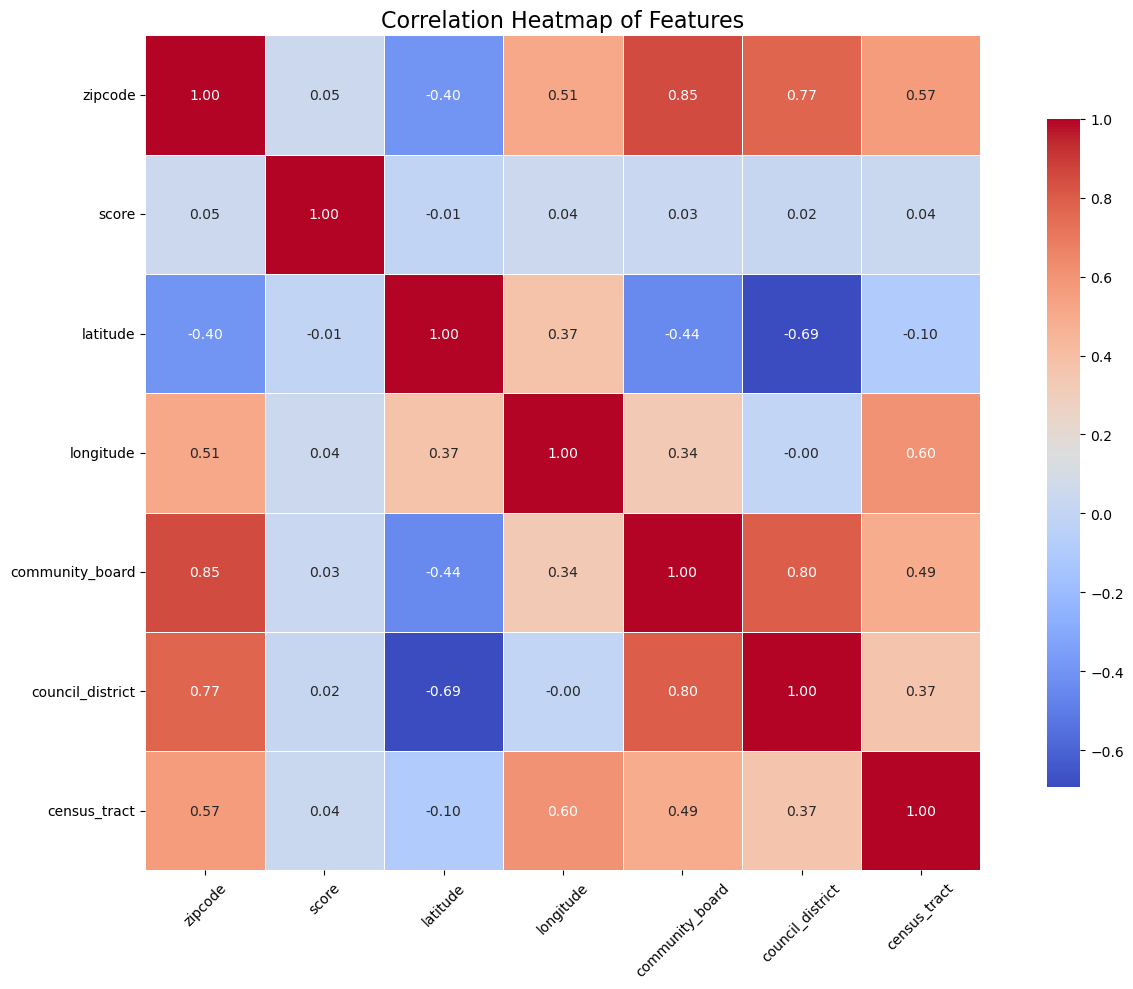

In [21]:
# Compute the correlation matrix (numeric features only)
corr_matrix = data_imputed.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": 0.8}, linewidths=0.5)

plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
data_imputed=data_imputed.drop(['community_board','council_district'], axis=1)

In [23]:
data_imputed.isna().sum()

dba                           0
boro                          0
street                        0
zipcode                       0
cuisine_description           0
action                        0
violation_code                0
violation_description         0
critical_flag                 0
score                         0
grade                    135218
inspection_type               0
latitude                      0
longitude                     0
census_tract                  0
dtype: int64

In [24]:
print(f'Dataset size before dropping duplicates: ',data_imputed.shape)
data_imputed = data_imputed.drop_duplicates()
print(f'Dataset size after dropping duplicates: ',data_imputed.shape)

Dataset size before dropping duplicates:  (266992, 15)
Dataset size after dropping duplicates:  (265845, 15)


In [25]:
# Convert ZIP to numeric and filter valid NYC ZIPs
data_imputed['zipcode'] = pd.to_numeric(data_imputed['zipcode'], errors='coerce')
data_imputed = data_imputed[data_imputed['zipcode'].notna()]
data_imputed['zipcode'] = data_imputed['zipcode'].astype(int)
data_imputed = data_imputed[data_imputed['zipcode'].between(10000, 11697)]
 
# Drop rows with missing geolocation/political fields
geo_cols = ['latitude', 'longitude', 'census_tract']
data_imputed = data_imputed.dropna(subset=geo_cols)


In [26]:
def risk_level(score):
    if score <= 13:
        return 'Low'
    elif score <= 27:
        return 'Moderate'
    else:
        return 'High'
 
data_imputed ['risk_segment'] = data_imputed ['score'].apply(risk_level)

In [27]:
data_imputed.columns

Index(['dba', 'boro', 'street', 'zipcode', 'cuisine_description', 'action',
       'violation_code', 'violation_description', 'critical_flag', 'score',
       'grade', 'inspection_type', 'latitude', 'longitude', 'census_tract',
       'risk_segment'],
      dtype='object')

In [28]:
# Top 10 risky cuisines
top_cuisines = data_imputed.groupby('cuisine_description')['score'].mean().sort_values(ascending=False).head(10).index
 
# Mark them
data_imputed['cuisine_risk'] = data_imputed['cuisine_description'].apply(lambda x: 'High' if x in top_cuisines else 'Normal')

data_imputed['cuisine_risk_encoded'] = data_imputed['cuisine_risk'].map({'Normal': 0, 'High': 1})
 

In [29]:
data_imputed.dtypes

dba                       object
boro                      object
street                    object
zipcode                    int64
cuisine_description       object
action                    object
violation_code            object
violation_description     object
critical_flag             object
score                    float64
grade                     object
inspection_type           object
latitude                 float64
longitude                float64
census_tract             float64
risk_segment              object
cuisine_risk              object
cuisine_risk_encoded       int64
dtype: object

In [30]:
#distribution of classes
print(data_imputed['critical_flag'].value_counts())
print(data_imputed['critical_flag'].value_counts(normalize=True) * 100)


critical_flag
Critical        145535
Not Critical    120310
Name: count, dtype: int64
critical_flag
Critical        54.744306
Not Critical    45.255694
Name: proportion, dtype: float64


In [31]:
# List of Critical Violation Codes based on NYC health department rules
critical_violation_codes = [
    '02A', '02B', '02C', '02D', '02F', '02G', '02H',
    '03A', '03B', '03C', '03D',
    '04A', '04B', '04C', '04D', '04E', '04F', '04H', '04L', '04M', '04N', '04P',
    '05A','06A', '06B', '06C', '06D', '06E', '06F',
    '08A', '08B','10B', '10F', '10G', '10H', '10I', '10J'
]

#  new column based on mapping
data_imputed['violation_severity'] = data_imputed['violation_code'].apply(
    lambda x: 1 if x in critical_violation_codes else 0
)

# Check sample
print(data_imputed[['violation_code', 'violation_severity']].head())

  violation_code  violation_severity
0            02B                   1
1            09B                   0
2            10J                   1
3            04M                   1
4            04L                   1


In [32]:
data_imputed = data_imputed.drop(['violation_code'],axis=1)

/var/folders/pc/r2t1qwm96jq5vbqf2x01w3ph0000gn/T/ipykernel_77169/2874413705.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_imputed, x='risk_cluster', palette='Set2')


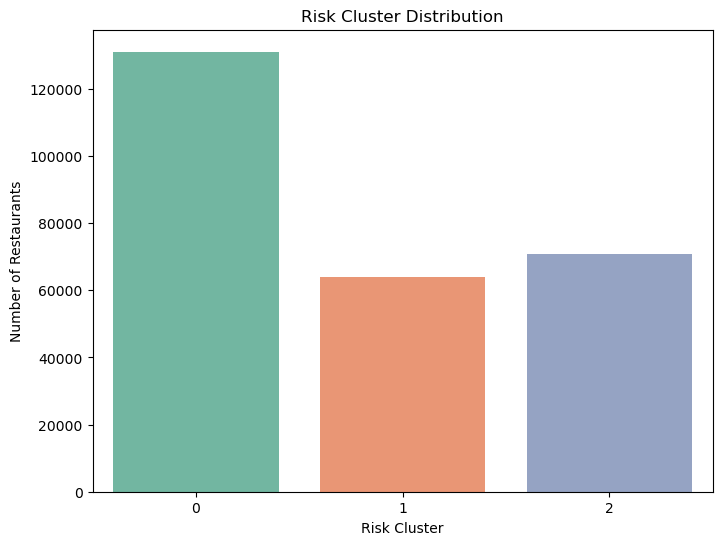

In [33]:

# Create 'boro_avg_score' if not exists
if 'boro_avg_score' not in data_imputed.columns:
    boro_risk = data_imputed.groupby('boro')['score'].mean().to_dict()
    data_imputed['boro_avg_score'] = data_imputed['boro'].map(boro_risk)

# Risk Clustering
risk_features = data_imputed[['boro_avg_score']]
kmeans_risk = KMeans(n_clusters=3, random_state=42)
data_imputed['risk_cluster'] = kmeans_risk.fit_predict(risk_features)

# Plot Risk Clusters
plt.figure(figsize=(8,6))
sns.countplot(data=data_imputed, x='risk_cluster', palette='Set2')
plt.title('Risk Cluster Distribution')
plt.xlabel('Risk Cluster')
plt.ylabel('Number of Restaurants')
plt.show()


In [34]:

# Features and Target
#X = data_imputed.drop(columns=[
#    'critical_flag', 'dba', 'street', 'action', 'violation_description', 
 #   'violation_code', 'cuisine_description', 'boro_avg_score'
#])

X = data_imputed.drop(columns=[
    'critical_flag',     # Target variable
    'census_tract',      # Drop spatial details
    'latitude', 'longitude',
    'dba', 'street', 'action',
    'violation_description', 
    'cuisine_description','zipcode'  # Still dropping high-cardinality
])

y = data_imputed['critical_flag']

# Split Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Encoding Rules ---
# Logistic Regression: One Hot Encode Categorical Features
# Random Forest, XGBoost: Label Encode Categorical Features

# Identify categorical and numeric features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 5.1 One-Hot Encode for Logistic Regression
X_train_log = pd.get_dummies(X_train, drop_first=True)
X_test_log = pd.get_dummies(X_test, drop_first=True)

# Ensure columns match after dummies
X_test_log = X_test_log.reindex(columns=X_train_log.columns, fill_value=0)

# 5.2 Label Encode for Tree-based models
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    le_dict[col] = le

# 5.3 Scaling only continuous (numeric) features for Logistic Regression
scaler = StandardScaler()
X_train_log[numerical_cols] = scaler.fit_transform(X_train_log[numerical_cols])
X_test_log[numerical_cols] = scaler.transform(X_test_log[numerical_cols])

# Target Encoding
target_encoder = LabelEncoder()
y_train_enc = target_encoder.fit_transform(y_train)
y_test_enc = target_encoder.transform(y_test)

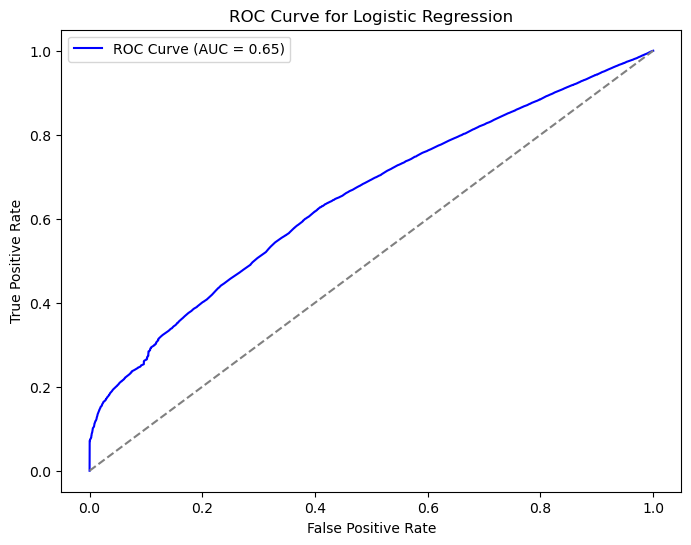


Logistic Regression:
Accuracy: 0.6075
Precision: 0.6122
Recall: 0.6075
F1-Score: 0.6084
AUC Score: 0.6476


In [35]:


# 6.1 Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_log, y_train_enc)
y_pred_log = log_model.predict(X_test_log)
y_prob_lr = log_model.predict_proba(X_test_log)[:, 1]


# calculating the performance metrics to analyse models performance
accuracy_lr = accuracy_score(y_test_enc, y_pred_log)
precision_lr = precision_score(y_test_enc, y_pred_log, average='weighted')
recall_lr = recall_score(y_test_enc, y_pred_log, average='weighted')
f1_lr = f1_score(y_test_enc, y_pred_log, average='weighted')

# Computing ROC curve and AUC score
fpr_lr, tpr_lr, _ = roc_curve(y_test_enc, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"AUC Score: {roc_auc_lr:.4f}")

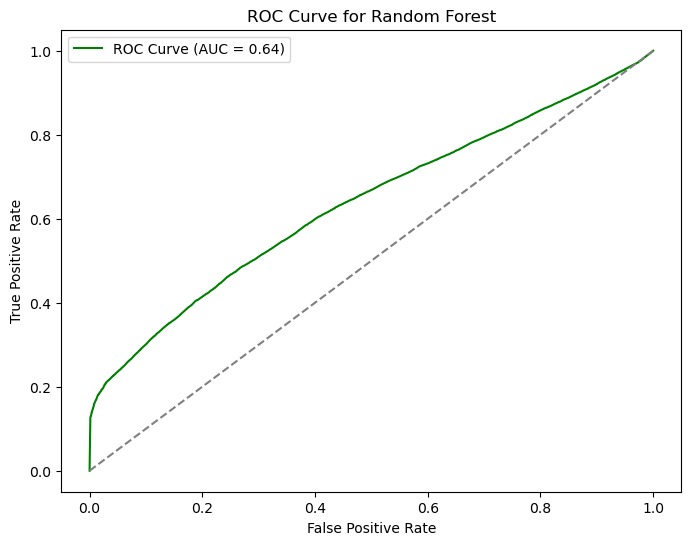


Random Forest Model Performance:
Accuracy: 0.6210
Precision: 0.6184
Recall: 0.6210
F1-Score: 0.6131
AUC Score: 0.6378


In [36]:
model_rf = RandomForestClassifier(
    n_estimators=100,   
    max_depth=None,       
    max_features='sqrt',     
    class_weight='balanced',
    random_state=42
)

#Training the model
model_rf.fit(X_train, y_train_enc)

# Predicting the target values
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1] 

# Performance metrics
accuracy_rf = accuracy_score(y_test_enc, y_pred_rf)
precision_rf = precision_score(y_test_enc, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_enc, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_enc, y_pred_rf, average='weighted')

#ROC Curve and AUC values
fpr_rf, tpr_rf, _ = roc_curve(y_test_enc, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

# Displaying the performance metrics
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC Score: {roc_auc_rf:.4f}")

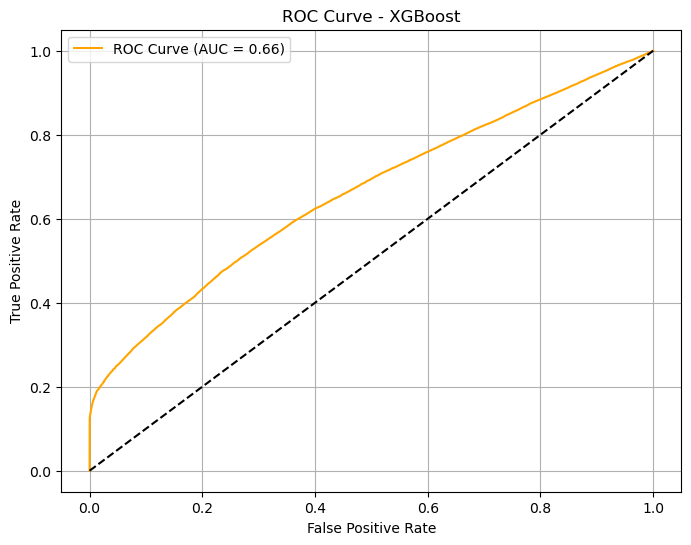


XGBoost Model Performance:
Accuracy:  0.6360
Precision: 0.6506
Recall:    0.6360
F1-Score:  0.6089
AUC Score: 0.6606


In [37]:
model_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss', 
    random_state=1025
)

#Training the model
model_xgb.fit(X_train, y_train_enc)

# Predicting the target values
y_pred_xgb = model_xgb.predict(X_test)
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Model Performance metrics
accuracy_xgb = accuracy_score(y_test_enc, y_pred_xgb)
precision_xgb = precision_score(y_test_enc, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_enc, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_enc, y_pred_xgb, average='weighted')

# ROC & AUC value
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_enc, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.grid()
plt.show()

# Displaying the performance metrics
print("\nXGBoost Model Performance:")
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")
print(f"AUC Score: {roc_auc_xgb:.4f}")

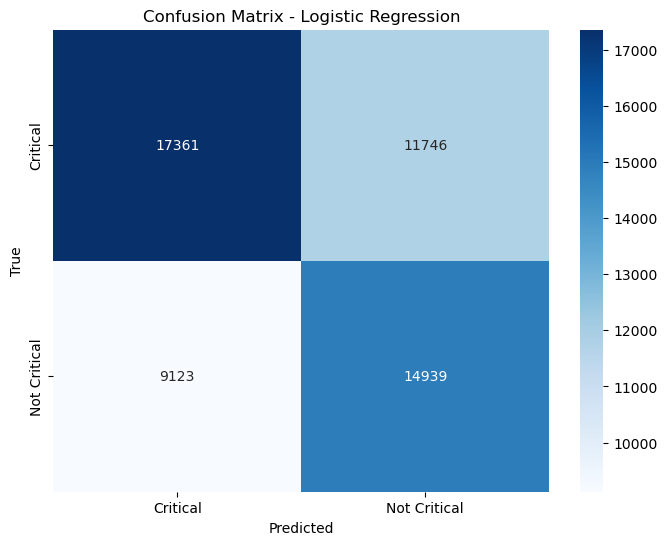

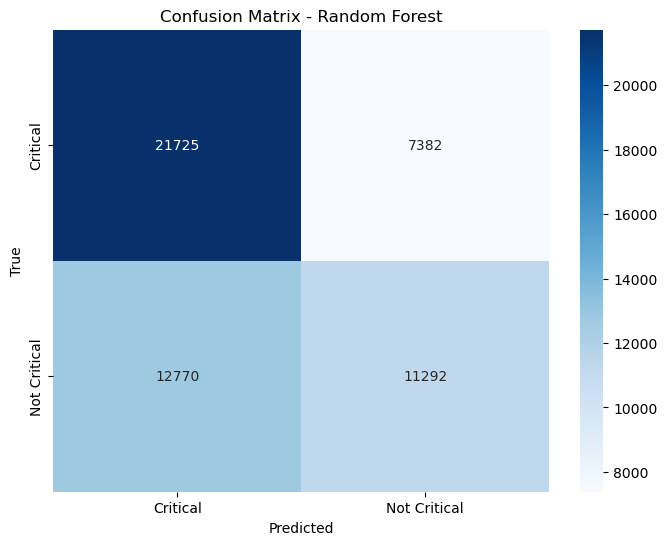

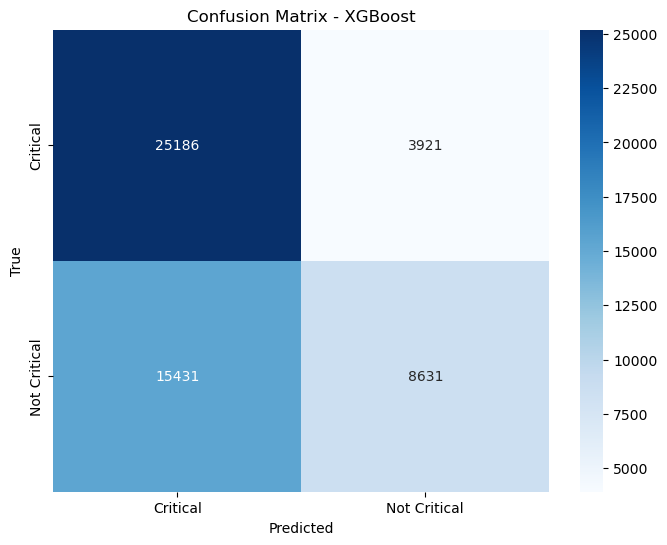

In [38]:

models = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [y_pred_log, y_pred_rf, y_pred_xgb]

for model_name, preds in zip(models, predictions):
    cm = confusion_matrix(y_test_enc, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_encoder.classes_, 
                yticklabels=target_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

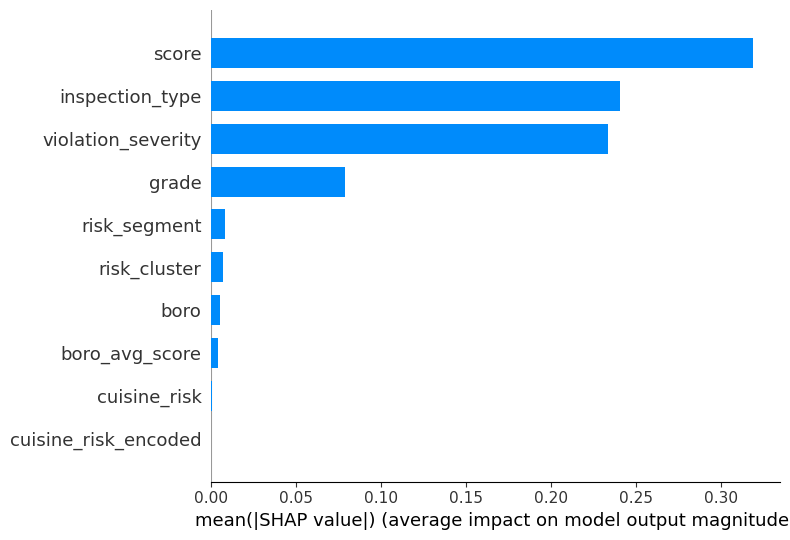

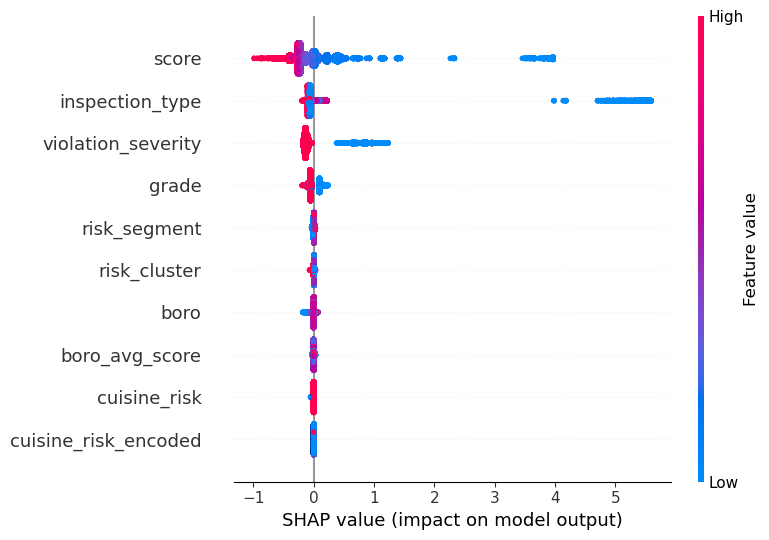

In [39]:
#Plotting Shap value graph for XGBoost
explainer_xgb = shap.TreeExplainer(model_xgb)

# Calculate SHAP values
shap_values_xgb = explainer_xgb.shap_values(X_test)

# displaying Global feature importance
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")

# SHAP value distribution
shap.summary_plot(shap_values_xgb, X_test)

In [40]:
#Fetching top 3 features which has highest importanc

importance_xgb = model_xgb.get_booster().get_score(importance_type='weight')

# Converting to DataFrame for sorting the values
importance_df_xgb = pd.DataFrame.from_dict(importance_xgb, orient='index', columns=['Importance'])
importance_df_xgb.index.name = 'Feature'
importance_df_xgb.reset_index(inplace=True)

top_3_features_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False).head(3)

print("Top 3 most important features in XGBoost:")
print(top_3_features_xgb)

Top 3 most important features in XGBoost:
              Feature  Importance
1               score       324.0
3     inspection_type       112.0
6  violation_severity        71.0


In [41]:
# Creating a table to analyse all models metrics
performance_summary = {
    "Logistic Regression": {
        "Accuracy": accuracy_lr,
        "Precision": precision_lr,
        "Recall": recall_lr,
        "F1-Score": f1_lr,
        "AUC": roc_auc_lr
    },
    "Random Forest": {
        "Accuracy": accuracy_rf,
        "Precision": precision_rf,
        "Recall": recall_rf,
        "F1-Score": f1_rf,
        "AUC": roc_auc_rf
    },
    "XGBoost": {
        "Accuracy": accuracy_xgb,
        "Precision": precision_xgb,
        "Recall": recall_xgb,
        "F1-Score": f1_xgb,
        "AUC": roc_auc_xgb
    }
}


performance_df = pd.DataFrame(performance_summary).T  # transpose for model rows
performance_df = performance_df.round(4)

print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score     AUC
Logistic Regression    0.6075     0.6122  0.6075    0.6084  0.6476
Random Forest          0.6210     0.6184  0.6210    0.6131  0.6378
XGBoost                0.6360     0.6506  0.6360    0.6089  0.6606


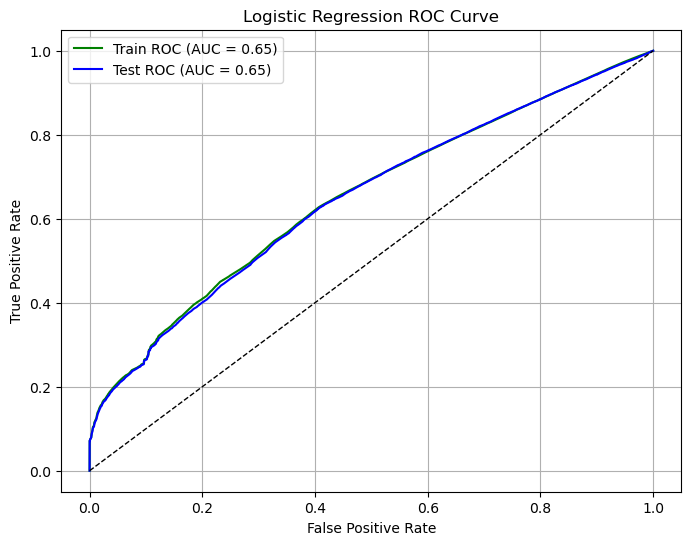


=== Logistic Regression - TRAIN ===
Accuracy:  0.6091
Precision: 0.6138
Recall:    0.6091
F1 Score:  0.6099
AUC Score: 0.6501

=== Logistic Regression - TEST ===
Accuracy:  0.6075
Precision: 0.6122
Recall:    0.6075
F1 Score:  0.6084
AUC Score: 0.6476


In [42]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
)

# ======= Train Predictions & Probabilities =======
y_pred_log_train = log_model.predict(X_train_log)
y_prob_log_train = log_model.predict_proba(X_train_log)[:, 1]

# ======= Test Predictions & Probabilities =======
y_pred_log_test = log_model.predict(X_test_log)
y_prob_log_test = log_model.predict_proba(X_test_log)[:, 1]

# ======= Metrics Function =======
def compute_metrics(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = auc(fpr, tpr)
    return acc, prec, rec, f1, fpr, tpr, auc_score

# ======= Compute for Train and Test =======
acc_tr, prec_tr, rec_tr, f1_tr, fpr_tr, tpr_tr, auc_tr = compute_metrics(y_train_enc, y_pred_log_train, y_prob_log_train)
acc_te, prec_te, rec_te, f1_te, fpr_te, tpr_te, auc_te = compute_metrics(y_test_enc, y_pred_log_test, y_prob_log_test)

# ======= Plot ROC Curve =======
plt.figure(figsize=(8, 6))
plt.plot(fpr_tr, tpr_tr, label=f'Train ROC (AUC = {auc_tr:.2f})', color='green')
plt.plot(fpr_te, tpr_te, label=f'Test ROC (AUC = {auc_te:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# ======= Print Metrics =======
print("\n=== Logistic Regression - TRAIN ===")
print(f"Accuracy:  {acc_tr:.4f}")
print(f"Precision: {prec_tr:.4f}")
print(f"Recall:    {rec_tr:.4f}")
print(f"F1 Score:  {f1_tr:.4f}")
print(f"AUC Score: {auc_tr:.4f}")

print("\n=== Logistic Regression - TEST ===")
print(f"Accuracy:  {acc_te:.4f}")
print(f"Precision: {prec_te:.4f}")
print(f"Recall:    {rec_te:.4f}")
print(f"F1 Score:  {f1_te:.4f}")
print(f"AUC Score: {auc_te:.4f}")

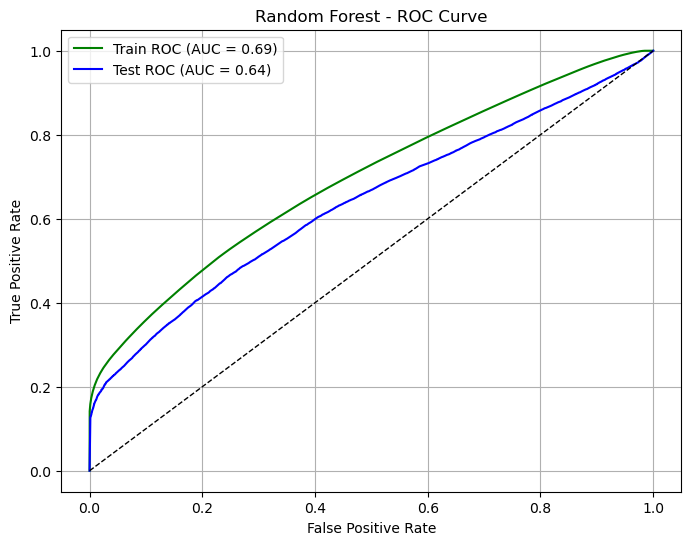


=== Random Forest - TRAIN ===
Accuracy:  0.6520
Precision: 0.6512
Recall:    0.6520
F1 Score:  0.6453
AUC Score: 0.6947

=== Random Forest - TEST ===
Accuracy:  0.6210
Precision: 0.6184
Recall:    0.6210
F1 Score:  0.6131
AUC Score: 0.6378


In [43]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
)

# ======= Train Predictions & Probabilities =======
y_pred_rf_train = model_rf.predict(X_train)
y_prob_rf_train = model_rf.predict_proba(X_train)[:, 1]

# ======= Test Predictions & Probabilities =======
y_pred_rf_test = model_rf.predict(X_test)
y_prob_rf_test = model_rf.predict_proba(X_test)[:, 1]

# ======= Metrics Function =======
def compute_metrics(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = auc(fpr, tpr)
    return acc, prec, rec, f1, fpr, tpr, auc_score

# ======= Compute for Train and Test =======
acc_tr, prec_tr, rec_tr, f1_tr, fpr_tr, tpr_tr, auc_tr = compute_metrics(y_train_enc, y_pred_rf_train, y_prob_rf_train)
acc_te, prec_te, rec_te, f1_te, fpr_te, tpr_te, auc_te = compute_metrics(y_test_enc, y_pred_rf_test, y_prob_rf_test)

# ======= Plot ROC Curve =======
plt.figure(figsize=(8, 6))
plt.plot(fpr_tr, tpr_tr, label=f'Train ROC (AUC = {auc_tr:.2f})', color='green')
plt.plot(fpr_te, tpr_te, label=f'Test ROC (AUC = {auc_te:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('Random Forest - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# ======= Print Metrics =======
print("\n=== Random Forest - TRAIN ===")
print(f"Accuracy:  {acc_tr:.4f}")
print(f"Precision: {prec_tr:.4f}")
print(f"Recall:    {rec_tr:.4f}")
print(f"F1 Score:  {f1_tr:.4f}")
print(f"AUC Score: {auc_tr:.4f}")

print("\n=== Random Forest - TEST ===")
print(f"Accuracy:  {acc_te:.4f}")
print(f"Precision: {prec_te:.4f}")
print(f"Recall:    {rec_te:.4f}")
print(f"F1 Score:  {f1_te:.4f}")
print(f"AUC Score: {auc_te:.4f}")

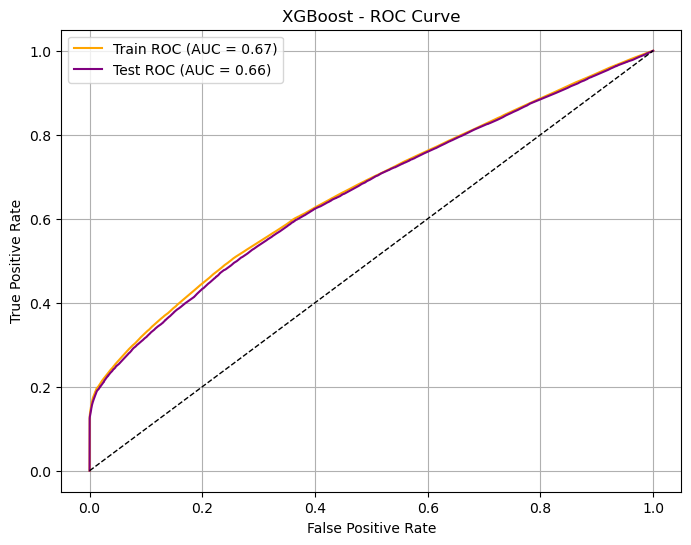


=== XGBoost - TRAIN ===
Accuracy:  0.6417
Precision: 0.6575
Recall:    0.6417
F1 Score:  0.6155
AUC Score: 0.6661

=== XGBoost - TEST ===
Accuracy:  0.6360
Precision: 0.6506
Recall:    0.6360
F1 Score:  0.6089
AUC Score: 0.6606


In [44]:
# ======= Train Predictions & Probabilities =======
y_pred_xgb_train = model_xgb.predict(X_train)
y_prob_xgb_train = model_xgb.predict_proba(X_train)[:, 1]

# ======= Test Predictions & Probabilities =======
y_pred_xgb_test = model_xgb.predict(X_test)
y_prob_xgb_test = model_xgb.predict_proba(X_test)[:, 1]

# ======= Metrics Function (Reused if already defined) =======
def compute_metrics(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = auc(fpr, tpr)
    return acc, prec, rec, f1, fpr, tpr, auc_score

# ======= Compute for Train and Test =======
acc_tr, prec_tr, rec_tr, f1_tr, fpr_tr, tpr_tr, auc_tr = compute_metrics(y_train_enc, y_pred_xgb_train, y_prob_xgb_train)
acc_te, prec_te, rec_te, f1_te, fpr_te, tpr_te, auc_te = compute_metrics(y_test_enc, y_pred_xgb_test, y_prob_xgb_test)

# ======= Plot ROC Curve =======
plt.figure(figsize=(8, 6))
plt.plot(fpr_tr, tpr_tr, label=f'Train ROC (AUC = {auc_tr:.2f})', color='orange')
plt.plot(fpr_te, tpr_te, label=f'Test ROC (AUC = {auc_te:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('XGBoost - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# ======= Print Metrics =======
print("\n=== XGBoost - TRAIN ===")
print(f"Accuracy:  {acc_tr:.4f}")
print(f"Precision: {prec_tr:.4f}")
print(f"Recall:    {rec_tr:.4f}")
print(f"F1 Score:  {f1_tr:.4f}")
print(f"AUC Score: {auc_tr:.4f}")

print("\n=== XGBoost - TEST ===")
print(f"Accuracy:  {acc_te:.4f}")
print(f"Precision: {prec_te:.4f}")
print(f"Recall:    {rec_te:.4f}")
print(f"F1 Score:  {f1_te:.4f}")
print(f"AUC Score: {auc_te:.4f}")

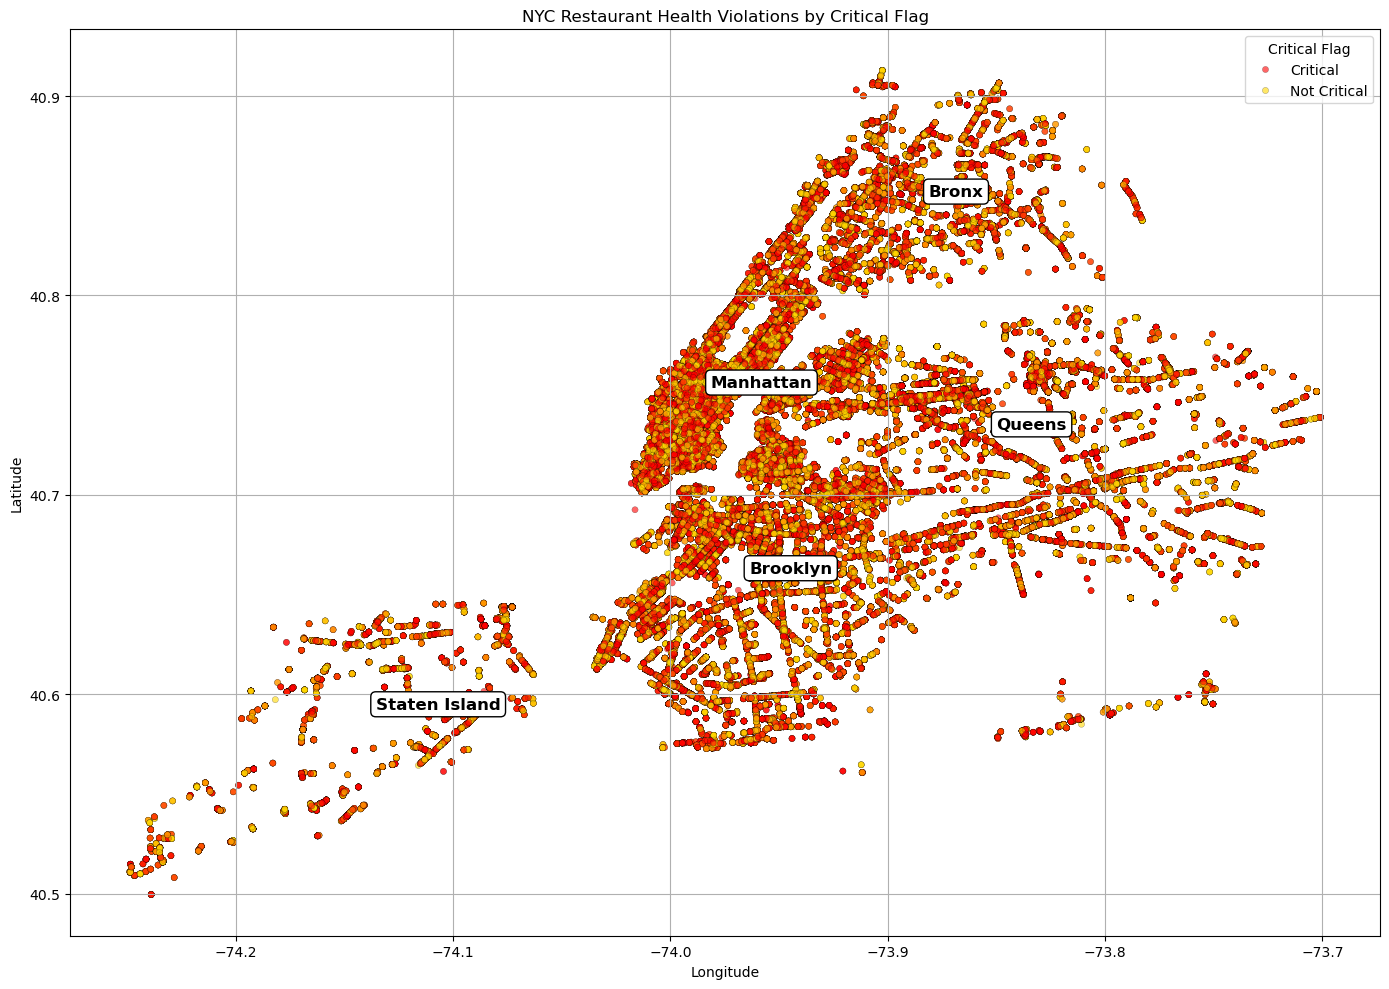

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Set color palette for flags
# ---------------------------
flag_palette = {
    'Critical': 'red',
    'Not Critical': 'gold',
    'Not Applicable': 'lightgrey'  # if still present
}

# ---------------------------
# Base heatmap of violations
# ---------------------------
plt.figure(figsize=(14, 10))
sns.scatterplot(data=data_imputed,
                x='longitude', y='latitude',
                hue='critical_flag',
                palette=flag_palette,
                alpha=0.6,
                edgecolor='k',
                linewidth=0.2,
                s=20)

# ---------------------------
# Borough labeling
# ---------------------------
boro_centroids = data_imputed.groupby('boro')[['latitude', 'longitude']].mean().reset_index()

for _, row in boro_centroids.iterrows():
    plt.text(row['longitude'], row['latitude'], row['boro'],
             fontsize=12, fontweight='bold', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# ---------------------------
# Plot details
# ---------------------------
plt.title('NYC Restaurant Health Violations by Critical Flag')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Critical Flag', loc='upper right')
plt.tight_layout()
plt.show()
